# 4-5. 2D記述子に基づく回帰予測 †
LogPappを目的変数、特徴ベクトルを2D記述子とし、データセットの795化合物に対して回帰を行う機械学習プログラムを作成せよ。学習器は線形回帰, リッジ回帰, Support Vector Regression, Random Forest回帰, LightGBM等を用いることができるよう準備すること。

In [25]:
import pandas as pd
desc_2d = pd.read_csv("data/2d_desc.csv", index_col=0)
df = pd.read_csv("data/fukunishi_data.csv", index_col=0)

In [26]:
print(df.shape)
print(desc_2d.shape)

(794, 4)
(794, 201)


In [27]:
# 説明変数に 2D記述子 を利用
X = desc_2d
 
# 目的変数に "Logp App" を利用
Y = df["LogP app"]

In [28]:
Y.head()

No.
1   -2.67
2   -2.85
3   -3.80
4   -2.91
5   -3.22
Name: LogP app, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def regression(model, x, y):
    X_train, X_test, Y_train ,Y_test = train_test_split(x, y)
    model.fit(X_train, Y_train)
    
    print(model.score(X_test, Y_test))
    
    plt.figure(figsize=(20,10))
    plt.plot(Y_test.values,label="True")
    plt.plot(model.predict(X_test), label="predicted")
    plt.legend()
    return model        

##  線形回帰

-0.005885678585628051


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

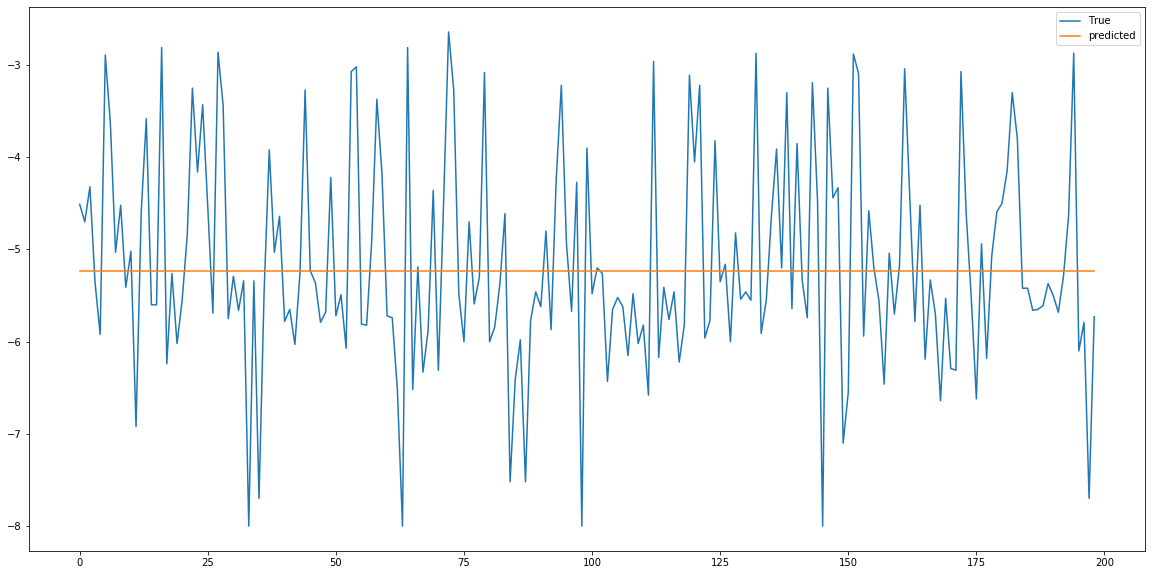

In [40]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
regression(clf, X, Y)

## リッジ回帰

0.6822134708753707


/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.0743e-68): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

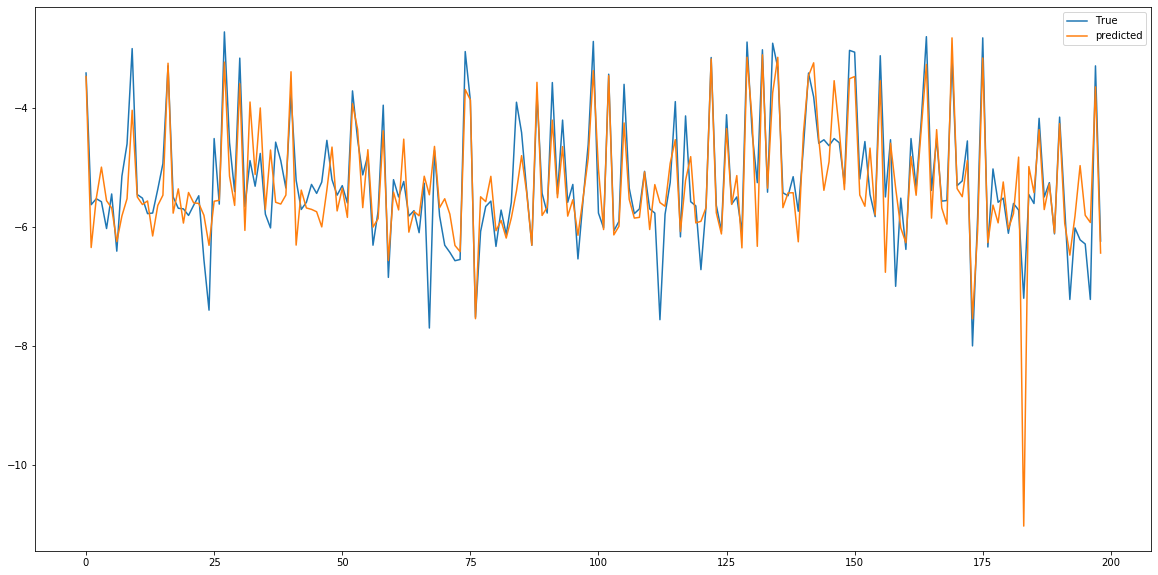

In [39]:
from sklearn import linear_model

reg = linear_model.Ridge(alpha=.5)
regression(reg, X, Y)

## Support Vector Regression

In [41]:
from sklearn.preprocessing import StandardScaler

#　標準化
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

0.4480555911116755


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

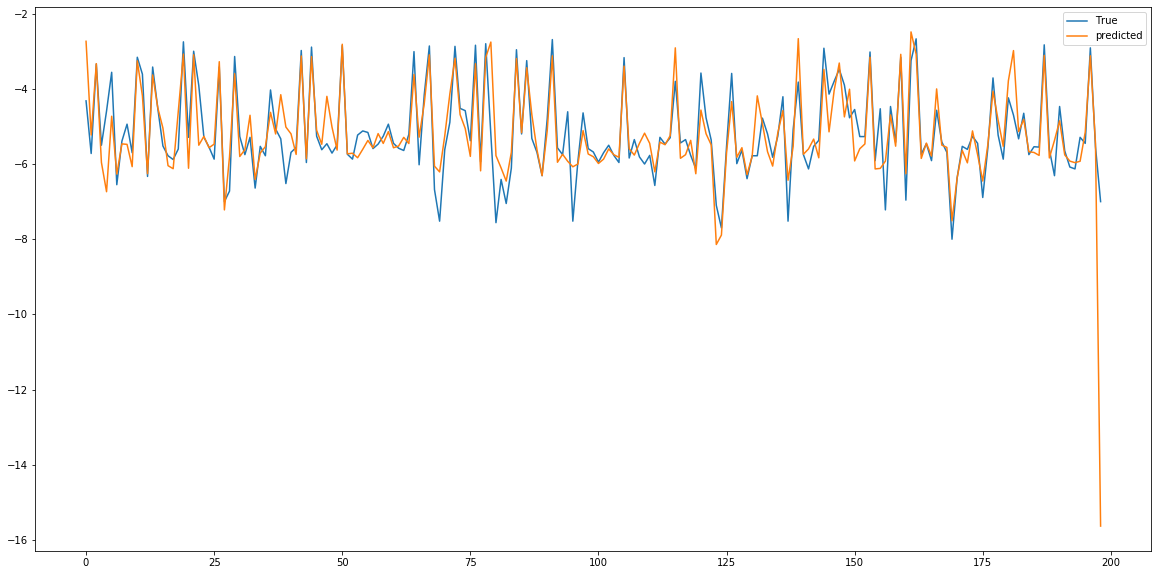

In [42]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
regression(svr, X_norm, Y)

## Random Forest回帰

0.8208456296703465


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=2525, verbose=0, warm_start=False)

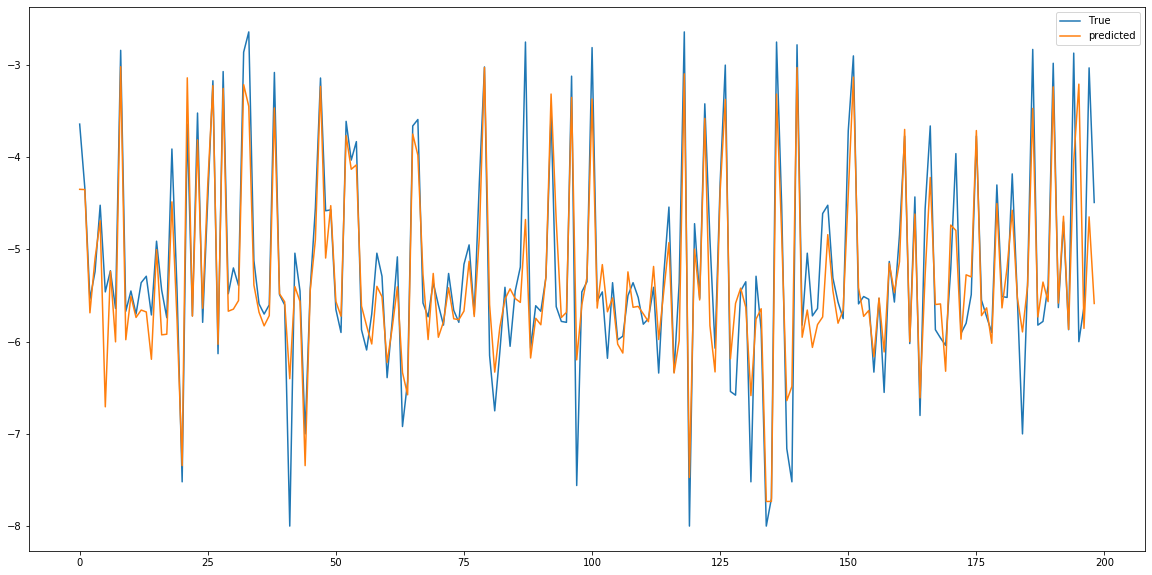

In [43]:
from sklearn.ensemble import RandomForestRegressor as RFR
 
rg = RFR(n_jobs=1, random_state=2525)
regression(rg, X_norm, Y)

In [35]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X, Y)

/Users/kaz_i/.pyenv/versions/miniconda3-4.3.30/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.21827e-68): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

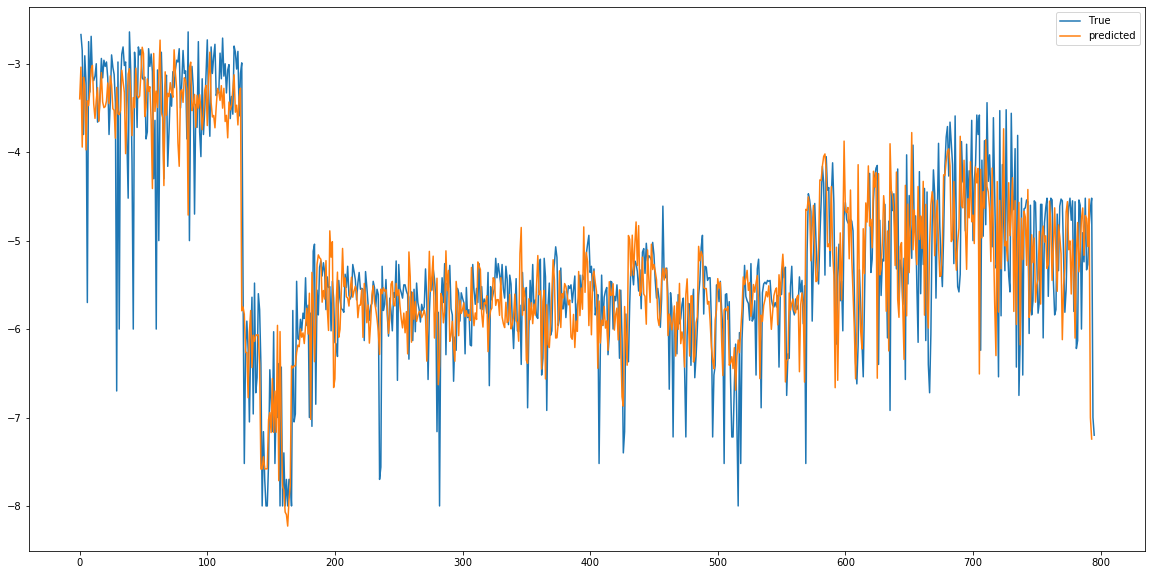

In [36]:
plt.figure(figsize=(20,10))
plt.plot(Y,label="True")
plt.plot(reg.predict(X), label="predicted")
plt.legend()

# LightBGM